In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(cavsim)

<module 'cavsim' from 'l:\\cavsim\\cavsim\\__init__.py'>


In [7]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [8]:
from cavsim.pipes.pipe import Pipe
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity

In [9]:
fluid = Fluid(1000, 1e-3, 2.08e9, 2.3e-3)

In [10]:
pipe = Pipe(0.065, 7.0, 0.002, 2e11, 1e-7, 10)

In [11]:
lb = LeftBoundaryPressure(101325)
pipe.connect(lb)

In [12]:
def pump(time):
    return -0.35 * np.minimum(np.sin(2.5 * time * 2.0 * np.pi), 0.0)

In [13]:
def step(time):
    return 0.35 * (time > 0.25)

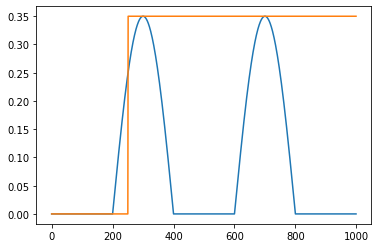

In [14]:
plt.plot(pump(np.arange(1000)/1000))
plt.plot(step(np.arange(1000)/1000))
plt.show()

In [15]:
rb = RightBoundaryVelocity(pump)
pipe.connect(rb)

In [16]:
plogs = []
vlogs = []
flogs = []
rblogs = []
relogs = []
def logging():
    plogs.append(pipe.field_wide_slice('pressure', 0) + 0.0)
    vlogs.append(pipe.field_wide_slice('velocity', 0) + 0.0)
    flogs.append(pipe.field_wide_slice('friction_steady', 0) + 0.0)
    rblogs.append(rb._velocity[0,1])
    relogs.append(pipe.field_wide_slice('reynolds', 0) + 0.0)

In [17]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = pipe
solver._callback = logging

In [18]:
solver.solve(1e20, 1.0, 3)

 0:00:00 [==                            |  7.55%]  0:00:02  Currently at time   0.076 of   1.000

l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.0005103895150650787 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x00000291620BA668>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))


 0:00:02 [==============================|100.00%]  0:00:00  Currently at time   1.000 of   1.000

In [19]:
pfield = np.stack(plogs)
vfield = np.stack(vlogs)
ffield = np.stack(flogs)
rbfield = np.stack(rblogs)
refield = np.stack(relogs)

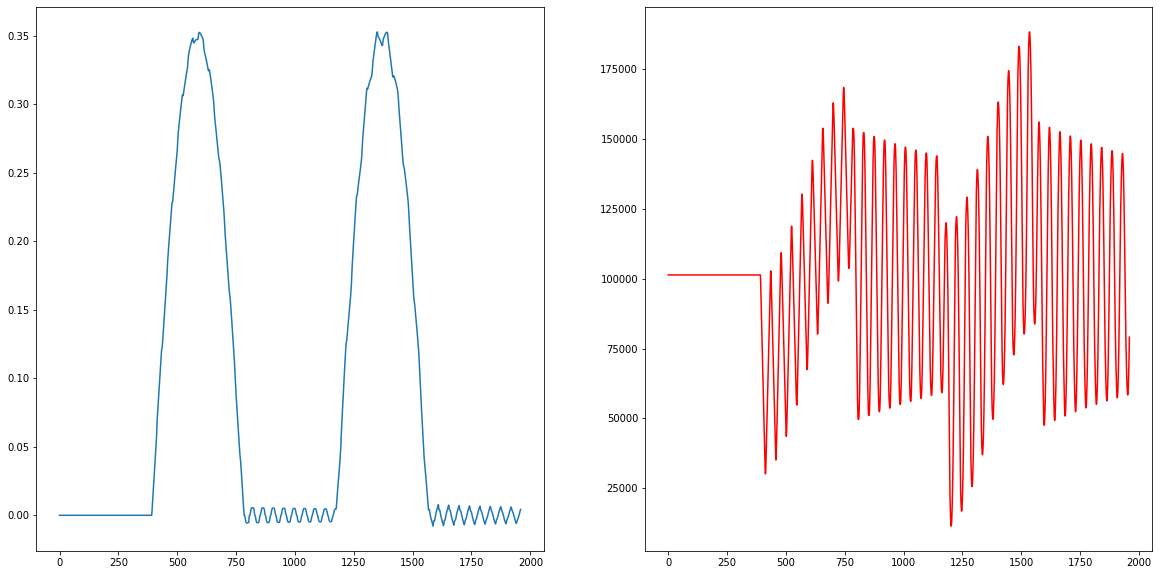

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(vfield[:,-2])
plt.subplot(1, 2, 2)
plt.plot(pfield[:,-2], color='red')
plt.show()

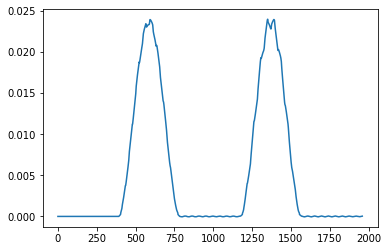

In [26]:
plt.plot(ffield[:,-2])
plt.show()

In [22]:
print(pipe._delta_t)
print(pipe._delta_x)
print(pipe.norm_speed_of_sound)
print(pipe.fluid.norm_density)

0.0005103895150650787
0.6363636363636364
1246.819571288597
1000


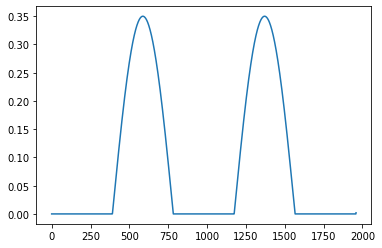

0.0019981572857226105


In [23]:
plt.plot(rbfield)
plt.show()
print(rbfield[-1])

In [ ]:
print(vfield[:,-2].shape)

In [ ]:
pfe = np.load('pressure_fe.npy')
vfe = np.load('velocity_fe.npy')

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(vfield[:,-2] - vfe[:])
#plt.plot(vfe)
plt.subplot(1, 2, 2)
plt.plot(pfield[:,-2] - pfe[:], color='red')
#plt.plot(pfe)
plt.show()

In [ ]:
print(pipe.field('velocity').shape)
print(np.load('current_velocity_fe.npy').shape)

In [ ]:
rb.prepare_next_timestep(rb._delta_t, 5.000286114406798)
print(pipe.right.value(Measure.velocityMinusCurrent))
pipe.field('velocity')[0,:] = np.load('current_velocity_fe.npy')[:]
pipe.field('pressure')[0,:] = np.load('current_pressure_fe.npy')[:]
pipe.field('velocity')[1,:] = np.load('last_velocity_fe.npy')[:]
pipe.field('pressure')[1,:] = np.load('last_pressure_fe.npy')[:]
pipe.finalize_current_timestep()

In [ ]:
print(pipe.field('pressure')[0,:].astype(int))

In [ ]:
for _ in pipe.field('reynolds')[0,:].tolist(): print(_)

In [ ]:
for _ in pipe.field('friction_steady')[0,:].tolist(): print(1000*_)

In [ ]:
for _ in pipe.field('velocity')[0,:]: print(_)

In [ ]:
#rb.prepare_next_timestep(rb._delta_t, 1.0003634565925612)
pipe.right.value(Measure.velocityMinusCurrent)

In [ ]:
for _ in pipe.field('brunone')[0,:].tolist(): print(_)

In [ ]:
for _ in pipe.field('friction_unsteady_a')[0,:].tolist(): print(_)

In [ ]:
plt.plot(ffield[:,1])
plt.xlim(1000,2000)
plt.show()